# Data Cleaning & Cheking Missing Values

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the new dataset
bikes = pd.read_csv('bikekharido_bikes123.csv')

# Data Cleaning
def clean_kms(x):
    # Remove non-digit characters
    s = re.sub(r'\D', '', str(x))
    return pd.to_numeric(s, errors='coerce')
bikes['kms_driven'] = bikes['kms_driven'].apply(clean_kms)
bikes['price'] = bikes['price'].replace({'₹ ': '', ',': ''}, regex=True).astype(float)
bikes['year'] = pd.to_numeric(bikes['year'], errors='coerce')
bikes = bikes.dropna(subset=['price', 'year', 'kms_driven'])

# Missing values check
print("\nMissing values after cleaning:")
print(bikes.isnull().sum())



Missing values after cleaning:
bike_name     0
price         0
kms_driven    0
ownership     0
location      0
year          0
brand         0
variant       0
dtype: int64


# UNIVARIATE ANALYSIS 

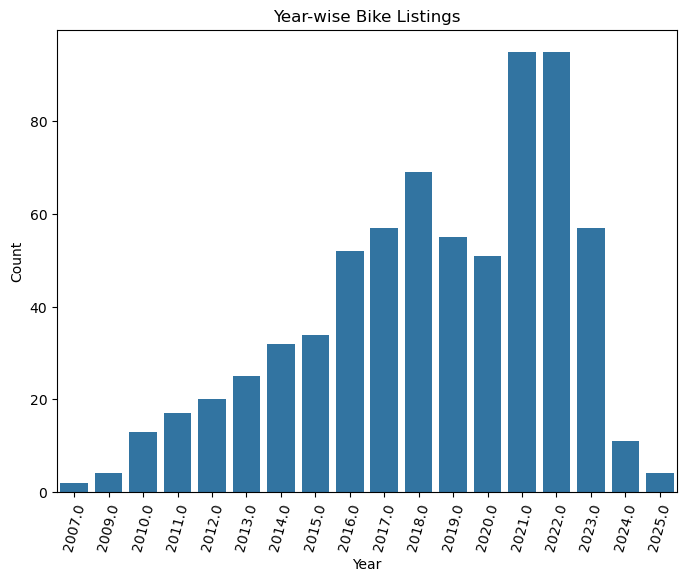

In [39]:
#Year Wise Distribution
plt.figure(figsize=(8,6))
sns.countplot(x='year', data=bikes)
plt.title("Year-wise Bike Listings")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=75)
plt.show()


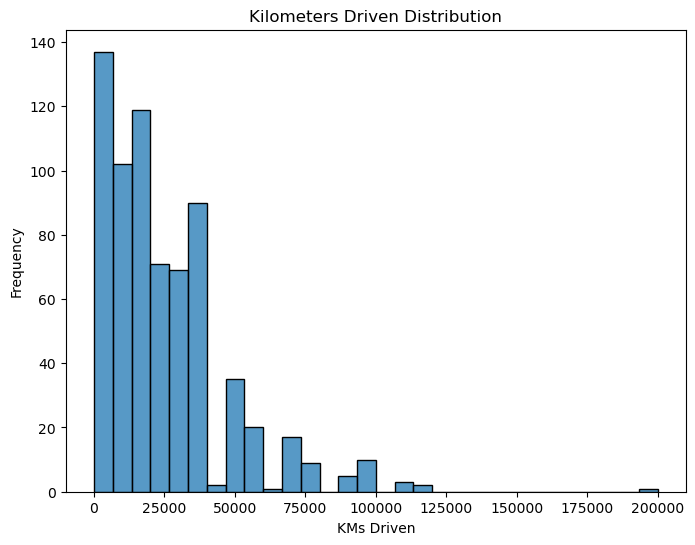

In [22]:
# KMs Driven Distribution
plt.figure(figsize=(8,6))
sns.histplot(bikes['kms_driven'], bins=30)
plt.title("Kilometers Driven Distribution")
plt.xlabel("KMs Driven")
plt.ylabel("Frequency")
plt.show()

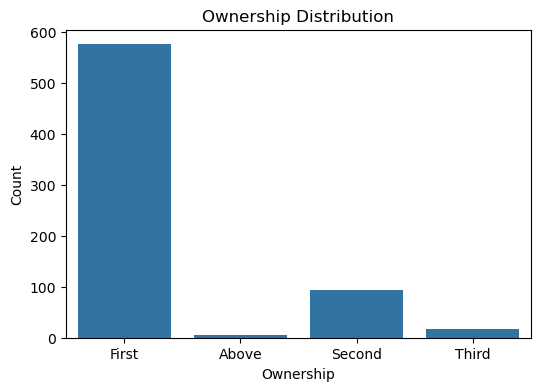

In [23]:
# Ownership type frequency
plt.figure(figsize=(6,4))
sns.countplot(x='ownership', data=bikes)
plt.title("Ownership Distribution")
plt.xlabel("Ownership")
plt.ylabel("Count")
plt.show()

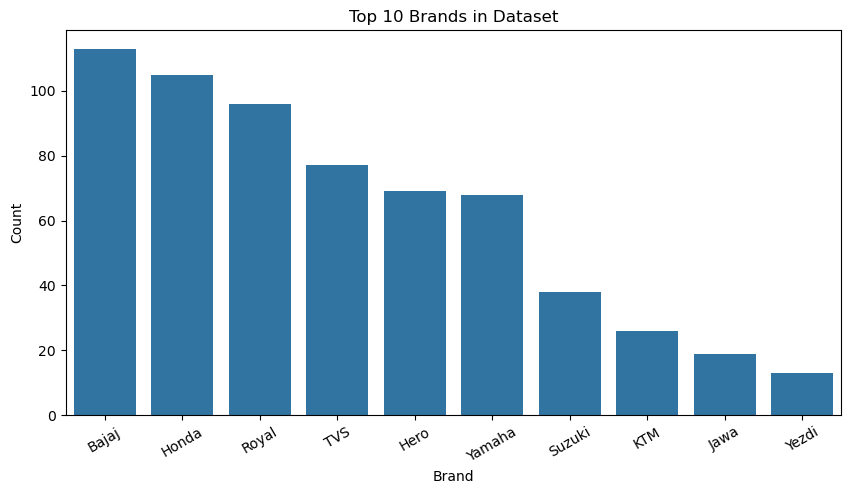

In [24]:
# Brand Frequency
if 'brand' in bikes.columns:
    top_brands = bikes['brand'].value_counts().head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_brands.index, y=top_brands.values)
    plt.title("Top 10 Brands in Dataset")
    plt.xlabel("Brand")
    plt.ylabel("Count")
    plt.xticks(rotation=30)
    plt.show()

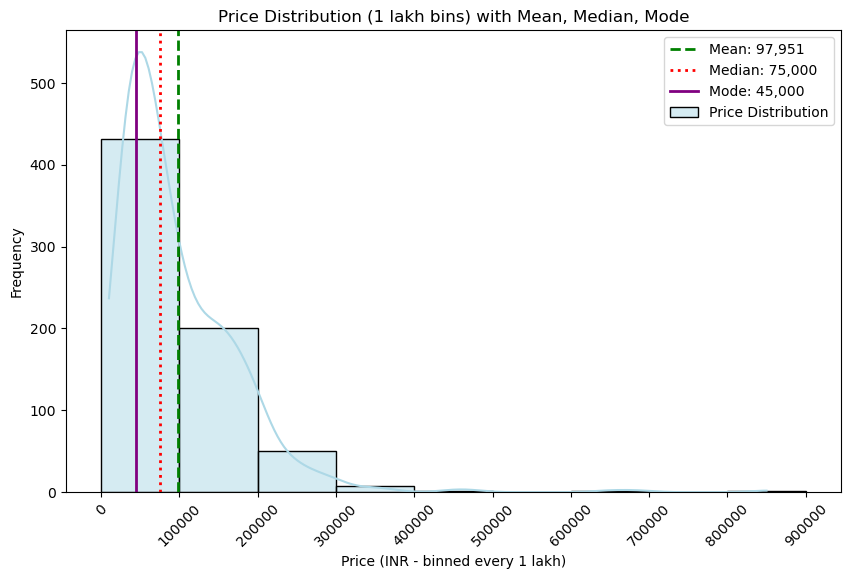

In [25]:
# Graph showing mean, median, and mode for Price
plt.figure(figsize=(10, 6))
max_price = bikes['price'].max()
bins = np.arange(0, max_price + 1e5, 1e5) # 1 lakh INR bins
sns.histplot(bikes['price'], bins=bins, color='lightblue', kde=True, label='Price Distribution')

mean_price = bikes['price'].mean()
median_price = bikes['price'].median()
mode_price = bikes['price'].mode().iloc[0]
# Plot statistics as vertical lines
plt.axvline(mean_price, color='green', linestyle='dashed', linewidth=2, label=f'Mean: {mean_price:,.0f}')
plt.axvline(median_price, color='red', linestyle='dotted', linewidth=2, label=f'Median: {median_price:,.0f}')
plt.axvline(mode_price, color='purple', linestyle='solid', linewidth=2, label=f'Mode: {mode_price:,.0f}')

plt.title("Price Distribution (1 lakh bins) with Mean, Median, Mode")
plt.xlabel("Price (INR - binned every 1 lakh)")
plt.ylabel("Frequency")
plt.xticks(np.arange(0, max_price+1e5, 1e5), rotation=45)
plt.legend()
plt.show()


# BIVARIATE ANALYSIS

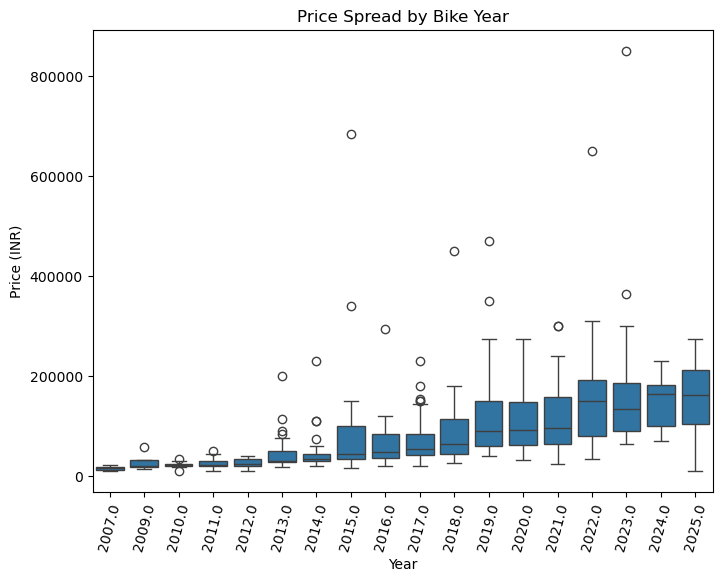

In [40]:
# Price vs Year
plt.figure(figsize=(8,6))
sns.boxplot(x='year', y='price', data=bikes)
plt.title("Price Spread by Bike Year")
plt.xlabel("Year")
plt.ylabel("Price (INR)")
plt.xticks(rotation=75)
plt.show()


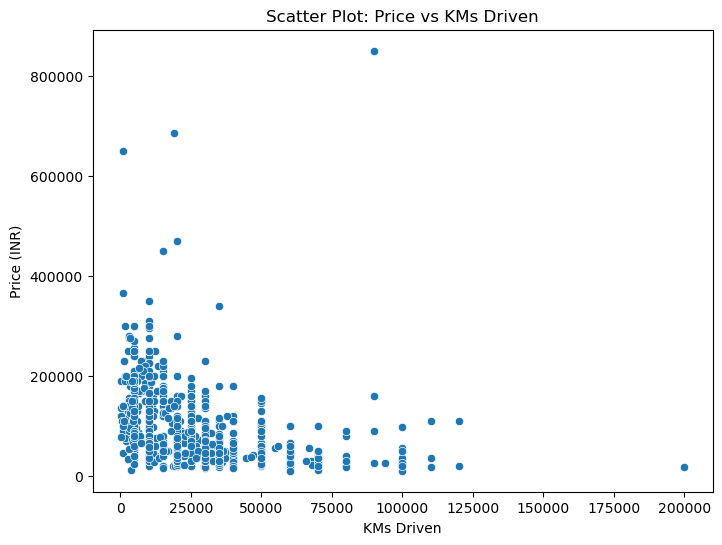

In [29]:
# Scatter plot: Price vs KMs Driven
plt.figure(figsize=(8,6))
sns.scatterplot(x='kms_driven', y='price', data=bikes)
plt.title("Scatter Plot: Price vs KMs Driven")
plt.xlabel("KMs Driven")
plt.ylabel("Price (INR)")
plt.show()


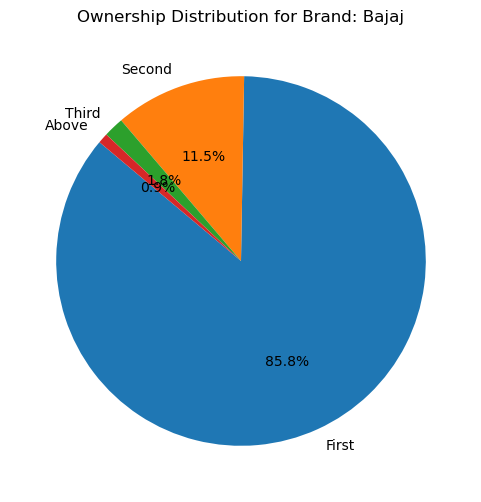

In [30]:
#Pie Chart : Specific Brand and Ownership
top_brands = bikes['brand'].value_counts().head(1).index
for brand in top_brands:
    plt.figure(figsize=(6,6))
    data = bikes[bikes['brand'] == brand]['ownership'].value_counts()
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Ownership Distribution for Brand: {brand}')
    plt.show()

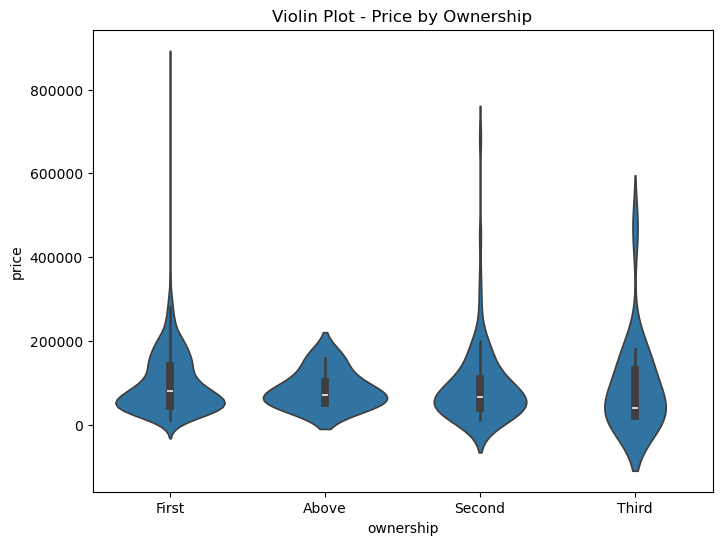

In [41]:
#Violin Plot-Price Vs Ownership
plt.figure(figsize=(8,6))
sns.violinplot(x='ownership', y='price', data=bikes)
plt.title('Violin Plot - Price by Ownership')
plt.show()


# CORRELATION ANALYSIS



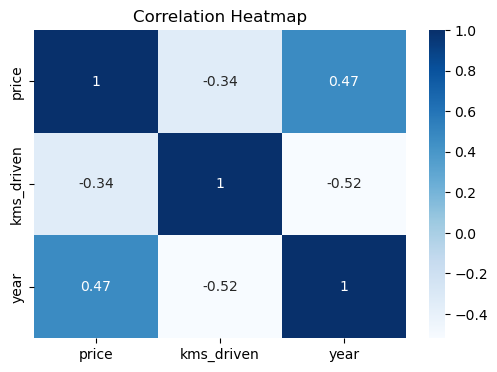

In [42]:
# Correlation Heatmap (Numerical Columns)
plt.figure(figsize=(6,4))
sns.heatmap(bikes[['price', 'kms_driven', 'year']].corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

# PIVOT TABLE

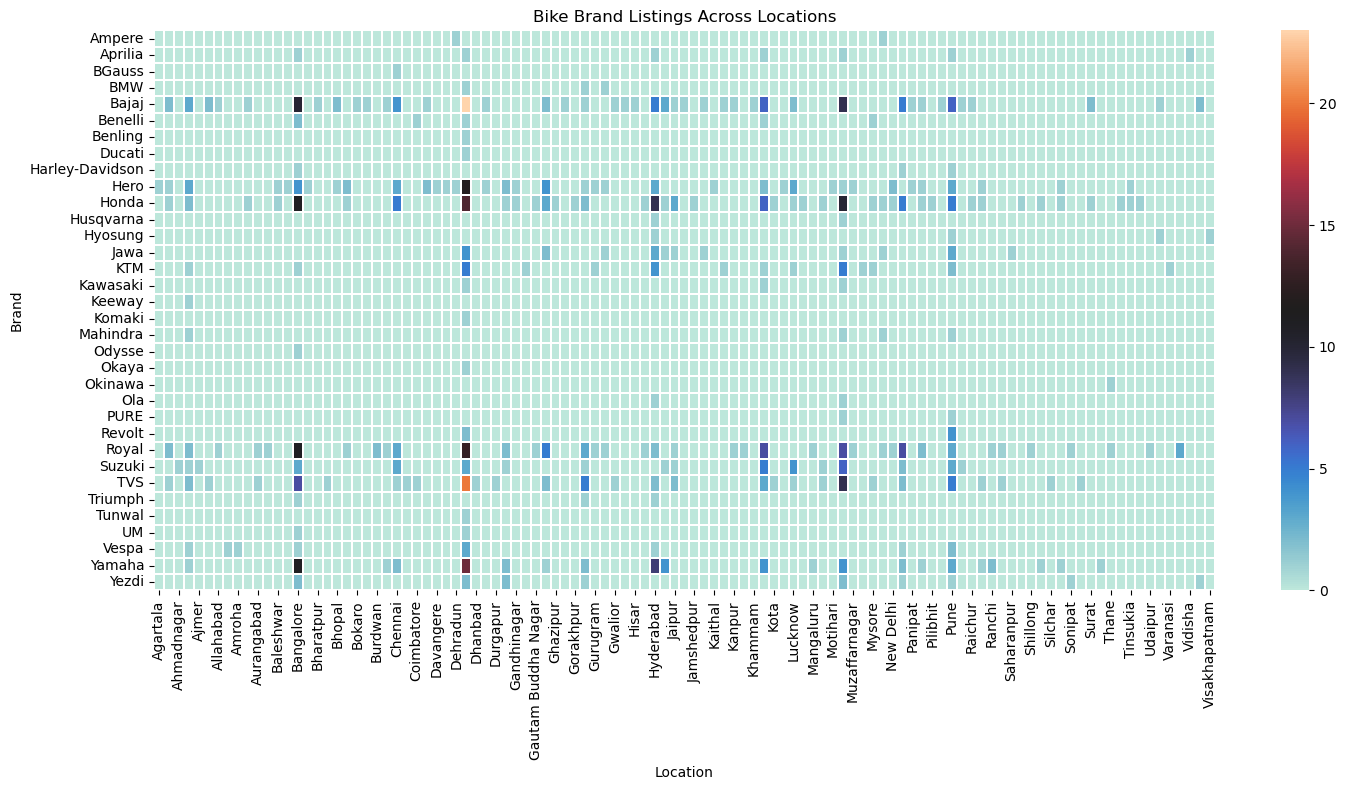

In [38]:
# Pivot table for Brand vs Location: Counts of bikes
brand_location_counts = pd.pivot_table(
    bikes, 
    index='brand', 
    columns='location', 
    values='price', 
    aggfunc='count', 
    fill_value=0
)

plt.figure(figsize=(15, 8))
sns.heatmap(brand_location_counts, cmap='icefire', annot=False, linewidths=0.1)
plt.title('Bike Brand Listings Across Locations')
plt.xlabel('Location')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

# CROSSTAB BAR PLOT

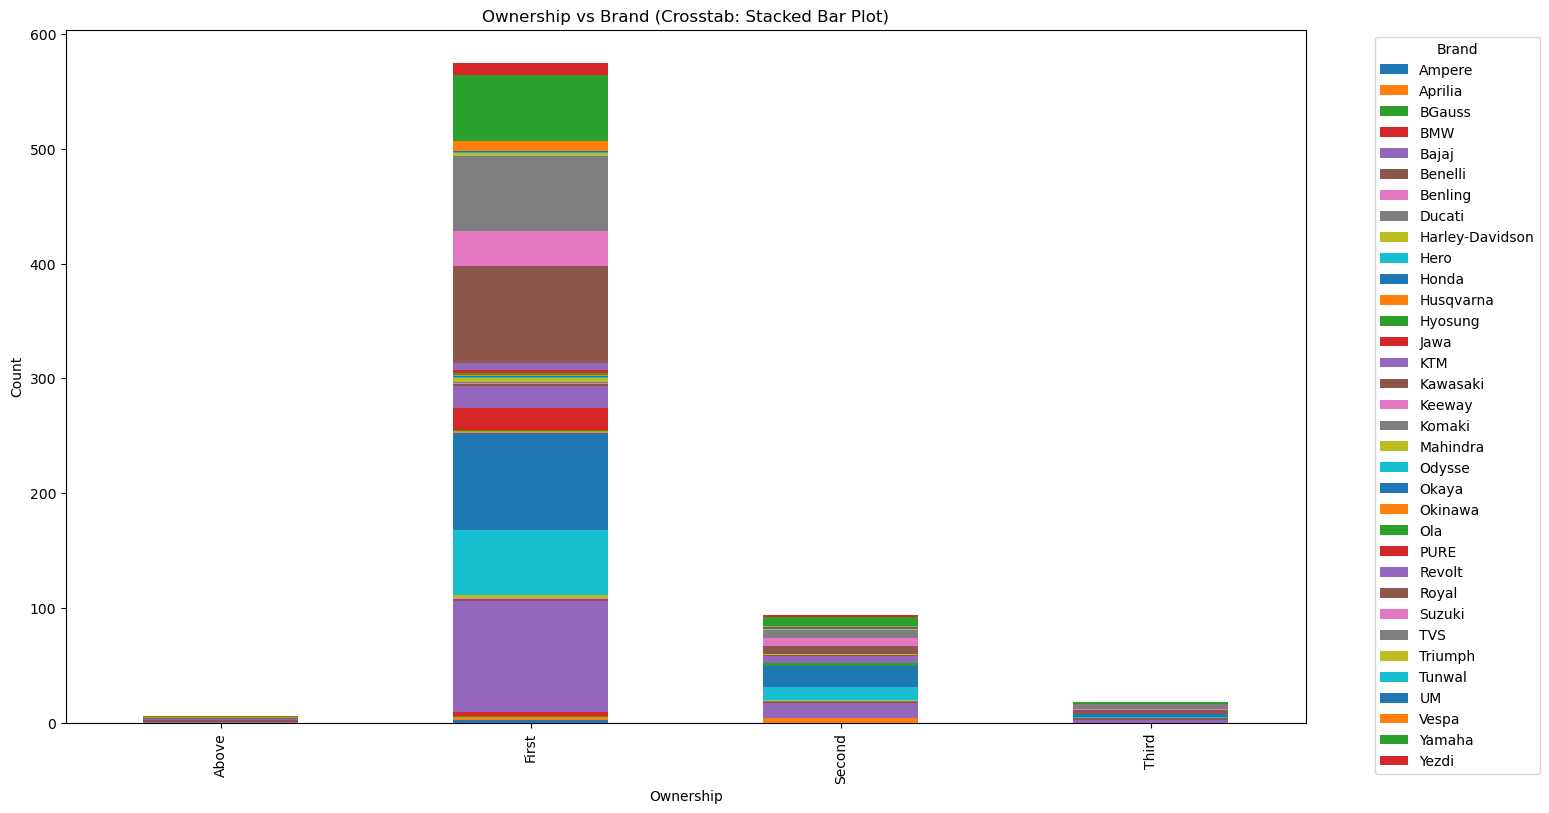

In [43]:
# Ownership vs Brand (stacked bar plot)
ownership_brand_crosstab.plot(kind='bar', stacked=True, figsize=(16, 9))
plt.title('Ownership vs Brand (Crosstab: Stacked Bar Plot)')
plt.xlabel('Ownership')
plt.ylabel('Count')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1))
plt.show()